In [93]:
import numpy as np
import pandas as pd

In [94]:
df=pd.read_excel(r"C:\Users\humay\OneDrive\Desktop\Data Science\Data Science Project\Flight Ticket Price Prediction\Data_Train.xlsx")

In [95]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [96]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Exploratory Data Analysis

In [100]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [101]:
df['journey_day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['journey_month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [102]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [103]:
df['journey_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['journey_minute'] = pd.to_datetime(df.Dep_Time).dt.minute

In [104]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_hour,journey_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [105]:
df.drop(columns=['Date_of_Journey', 'Dep_Time'],inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_hour,journey_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [106]:
df.drop(columns=['Arrival_Time'],inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_hour,journey_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50


In [107]:
duration=list(df.Duration)
len(duration)

10682

In [108]:
duration[0]

'2h 50m'

In [109]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [110]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m "
        elif "m" in duration[i]:
            duration[i]="0h {}".format(duration[i].strip())

In [111]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m ',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m ',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m ',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m ',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m ',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m ',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m ',
 '21h 20m',
 '5h 25m',
 '18h 45m',

In [112]:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_mins.append(int(duration[i].split()[1][:-1]))

In [113]:
df['duration_hours'] = duration_hours
df['duration_mins'] = duration_mins

In [114]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,7,25


In [115]:
df.drop(['Duration'],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25


In [116]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [117]:
df.Airline = df.Airline.apply(lambda x: x.strip())
airline_stats = df.Airline.value_counts(ascending=False)

In [118]:
airline_stats_less_than_10 = airline_stats[airline_stats <=10]

In [119]:
df.Airline = df.Airline.apply(lambda x: 'other' if x in airline_stats_less_than_10 else x)

In [120]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
other                                  10
Name: Airline, dtype: int64

In [121]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [122]:
df.drop(['Additional_Info'],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,7,25


In [123]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXB → DEL → BLR             1
BOM → JLR → HYD                   1
CCU → VTZ → BLR                   1
BOM → BBI → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 128, dtype: int64

In [124]:
df.drop(['Route'],axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,25


In [125]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [126]:
df.replace({"non-stop":0, "1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7,25


In [127]:
df_dummies = pd.get_dummies(data=df, columns=['Airline','Source','Destination'],drop_first=True)
df_dummies

,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,2,35,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,2,40,0,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
df=df_dummies

In [129]:
df.describe()

,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,10.244898,28.326624,0.163921,0.018161,...,0.000936,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,8.494916,16.945817,0.370221,0.133541,...,0.030584,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,2.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,8.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,15.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df.corr()

,Total_Stops,Price,journey_day,journey_month,journey_hour,journey_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.739916,-0.136706,0.271094,-0.060110,...,0.003437,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.508778,-0.124855,0.050432,-0.095151,...,0.192712,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.022059,-0.008940,-0.032490,-0.003122,...,-0.038301,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,0.016141,-0.040897,-0.045981,-0.004494,...,-0.042290,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
journey_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.002869,-0.023707,-0.012879,-0.016373,...,-0.007407,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
journey_minute,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,-0.022104,0.092485,-0.045688,0.076751,...,-0.002299,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,1.000000,-0.126468,0.261707,-0.094044,...,-0.020702,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.126468,1.000000,-0.033427,0.067215,...,-0.001493,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866
Airline_Air India,0.271094,0.050432,-0.032490,-0.045981,-0.012879,-0.045688,0.261707,-0.033427,1.000000,-0.060221,...,-0.013554,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072
Airline_GoAir,-0.060110,-0.095151,-0.003122,-0.004494,-0.016373,0.076751,-0.094044,0.067215,-0.060221,1.000000,...,-0.004163,-0.026156,-0.009049,-0.042921,-0.035933,-0.009049,0.099863,-0.035933,-0.026156,0.017573


In [132]:
df.corr()['Price'].sort_values()

Airline_IndiGo                              -0.361070
Destination_Delhi                           -0.313417
Airline_SpiceJet                            -0.296565
Destination_Hyderabad                       -0.230755
Source_Mumbai                               -0.230755
Source_Chennai                              -0.179223
Destination_Kolkata                         -0.179223
journey_day                                 -0.153774
duration_mins                               -0.124855
journey_month                               -0.103643
Airline_GoAir                               -0.095151
Airline_Vistara                             -0.060654
journey_minute                              -0.024458
journey_hour                                 0.006799
Source_Kolkata                               0.009358
Airline_Multiple carriers Premium economy    0.017650
Airline_Air India                            0.050432
Airline_Multiple carriers                    0.139793
Destination_New Delhi       

In [133]:
x=df.drop("Price", axis=1)
y=df["Price"]

In [134]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.29781964,  1.16429632, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -1.71642404,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.57461744, -0.405463  ,  1.17509575, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [-1.29781964,  1.42669838, -0.69761654, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-1.29781964, -1.71642404, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -0.405463  ,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.29781964,  1.16429632, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -1.71642404,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.57461744, -0.405463  ,  1.17509575, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [-1.29781964,  1.42669838, -0.69761654, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-1.29781964, -1.71642404, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -0.405463  ,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [136]:
len(x)
len(y)

10682

Scalling the data using Min-Max scaller

In [137]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [138]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.5958142344398448
At random state 0, the testing accuracy is 0.6215030306585665


At random state 1, the training accuracy is 0.5958142344398448
At random state 1, the testing accuracy is 0.6215030306585665


At random state 2, the training accuracy is 0.5958142344398448
At random state 2, the testing accuracy is 0.6215030306585665


At random state 3, the training accuracy is 0.5958142344398448
At random state 3, the testing accuracy is 0.6215030306585665


At random state 4, the training accuracy is 0.5958142344398448
At random state 4, the testing accuracy is 0.6215030306585665


At random state 5, the training accuracy is 0.5958142344398448
At random state 5, the testing accuracy is 0.6215030306585665


At random state 6, the training accuracy is 0.5958142344398448
At random state 6, the testing accuracy is 0.6215030306585665


At random state 7, the training accuracy is 0.5958142344398448
At random state 7, the testing accuracy is 0.621

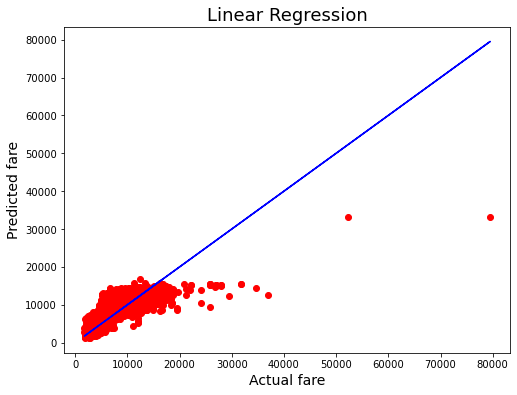

In [140]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fare',fontsize=14)
plt.ylabel('Predicted fare',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [145]:
parameters = {'alpha':[.001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [146]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

59.58229826098322

In [147]:
pred_ls=ls.predict(x_test)

In [148]:
lss=r2_score(y_test,pred_ls)
lss*100

62.13568409780316

In [149]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

60.04181943704258

Ensemble Techniques

In [151]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [ ]:
 rf = RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score: ',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score: ',rfc*100)

R2 Score:  83.33113645951002


In [ ]:
import pickle
filename = 'WineQuality.pkl'
pickle.dump(lr, open(filename,'wb'))